In [147]:
from bs4 import BeautifulSoup
import time
import requests
import json
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

### Womens Bouldering Results

In [196]:
#2015
wc_munuich_2015_w = 'https://ifsc-egw.wavecdn.net/egw/ranking/json.php?comp=1584&cat=5&callback=jsonp'



wc_meiringen_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7128&cat=5&callback=jsonp'
wc_moscow_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7134&cat=5&callback=jsonp'
wc_taian_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7137&cat=5&callback=jsonp'
wc_chongqing_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7140&cat=5&callback=jsonp'
wc_hachioji_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7152&cat=5&callback=jsonp'
wc_villars_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7164&cat=5&callback=jsonp'
wc_hong_kong_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=8328&cat=5&callback=jsonp'
wc_vail_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7158&cat=5&callback=jsonp'
wc_munich_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7155&cat=5&callback=jsonp'
wc_innsbruck_w = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=1564&cat=5&callback=jsonp'

In [187]:
womens_comp = [wc_meiringen_w,wc_moscow_w,wc_taian_w,wc_chongqing_w,wc_hachioji_w,wc_villars_w,wc_hong_kong_w,wc_vail_w,wc_innsbruck_w]

### Mens Bouldering Results

In [186]:
wc_meiringen_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7128&cat=6&callback=jsonp'
wc_moscow_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7134&cat=6&callback=jsonp'
wc_chongqing_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7140&cat=6&callback=jsonp'
wc_hachioji_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7152&cat=6&callback=jsonp'
wc_taian_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7137&cat=6&callback=jsonp'
wc_villars_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7164&cat=6&callback=jsonp'
wc_hong_kong_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=8328&cat=6&callback=jsonp'
wc_vail_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7158&cat=6&callback=jsonp'
wc_munich_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=7155&cat=6&callback=jsonp'
wc_innsbruck_m = 'https://ifsc.egroupware.net/egw/ranking/json.php?comp=1564&cat=6&callback=jsonp'

In [197]:
#read in the url and create a dictionary from the json
url = wc_munuich_2015_w
r = requests.get(url)
response = requests.get(url)
data_json = response.text.split("(", 1)[1].strip(");\n")
new_dict = json.loads(data_json)

In [198]:
competitions = new_dict['route_names']
competitions

{'-1': 'General Result',
 '0': 'Qualification 1. Group',
 '1': 'Qualification 2. Group',
 '2': 'Semifinal',
 '3': 'Final'}

In [205]:
ranking = new_dict['participants']
ranking[0]

{'PerId': '8247',
 'acl': '63',
 'birthyear': 1993,
 'city': 'Sheffield',
 'fed_id': '7',
 'fed_url': 'http://www.thebmc.co.uk/',
 'federation': 'British Mountaineering Council',
 'firstname': 'Shauna',
 'lastname': 'Coxsey',
 'nation': 'GBR',
 'result1': '4t8\xa04b8',
 'result2': '3t5\xa03b4',
 'result3': '4t4\xa04b4',
 'result_modified': '1439562454',
 'result_rank': 1,
 'result_rank1': '3',
 'result_rank2': '5',
 'result_rank3': '1',
 'rkey': 'SCO07F',
 'start_number': '3',
 'start_order': '2',
 'top_tries': 8,
 'tops': 4,
 'url': 'https://ifsc.egroupware.net/egw/ranking/sitemgr/digitalrock/pstambl.html#person=8247&cat=5',
 'zone_tries': 8,
 'zones': 4}

In [199]:
#create a pandas dataframe with informaion of all the participants
df = pd.DataFrame(ranking)

In [200]:
df['city'] = df['city'].str.lower()
df['firstname'] = df['firstname'].str.lower()
df['lastname'] = df['lastname'].str.lower()

In [201]:
for key in ['PerId','acl','fed_url','start_number','fed_id','result_modified','rkey','url','federation','fed_parent']:
    if key in df.keys():
        df = df.drop(key,axis=1)

In [202]:
df

,birthyear,city,firstname,lastname,nation,result0,result1,result2,result3,result_rank,result_rank0,result_rank1,result_rank2,result_rank3,start_order,top_tries,tops,zone_tries,zones
0,1993,sheffield,shauna,coxsey,GBR,NaN,4t8 4b8,3t5 3b4,4t4 4b4,1,NaN,3,5,1,2,8.0,4,8.0,4
1,1993,massy,fanny,gibert,FRA,4t9 4b5,NaN,4t15 4b13,3t3 4b7,2,2,NaN,3,2,6,9.0,4,5.0,4
2,1997,colorado springs,megan,mascarenas,USA,NaN,3t3 3b3,4t7 4b7,3t4 4b5,3,NaN,4,1,3,5,3.0,3,3.0,3
3,1989,"ryugasaki-shi, ibaraki",akiyo,noguchi,JPN,4t5 5b7,NaN,3t6 3b6,2t3 4b6,4,1,NaN,6,4,1,5.0,4,7.0,5
4,1997,nis,stasa,gejo,SRB,3t6 4b6,NaN,4t15 4b10,1t2 3b3,5,6,NaN,2,5,16,6.0,3,6.0,4
5,1995,ljubljana,katja,kadic,SLO,NaN,3t5 4b9,4t15 4b15,1t3 3b4,6,NaN,5,4,6,34,5.0,3,9.0,4
6,1997,"toshima-ku, tokyo",miho,nonaka,JPN,NaN,4t5 4b5,3t8 3b8,NaN,7,NaN,1,7,NaN,1,5.0,4,5.0,4
7,1994,"chungbuk, cheongju, sangdang-gu,",sol,sa,KOR,NaN,3t9 4b10,3t10 3b9,NaN,8,NaN,8,8,NaN,4,9.0,3,10.0,4
8,1990,oslo,hannah,midtboe,NOR,3t4 4b7,NaN,3t11 3b10,NaN,9,3,NaN,9,NaN,13,4.0,3,7.0,4
9,1996,masnuy saint pierre,chloe,caulier,BEL,3t6 3b4,NaN,3t12 4b13,NaN,10,9,NaN,10,NaN,10,6.0,3,4.0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b407f4780>]],
      dtype=object)

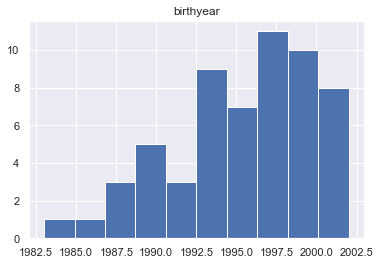

In [194]:
df.hist(column='birthyear')

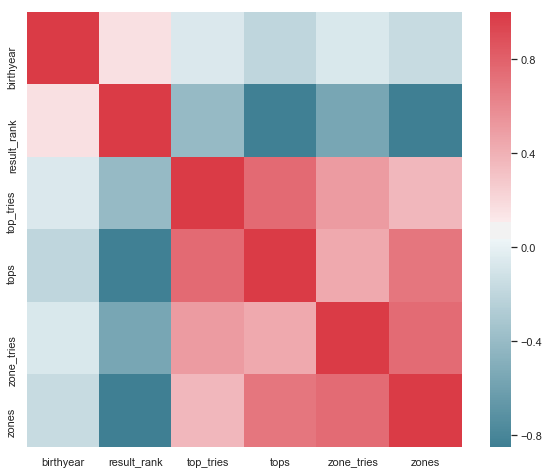

In [195]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)